# Benchmark ComBind on PDB ligands

In [1]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
results = {} # prot -> ({ligand: (combind, glide, best)...}, (combind, glide, best))

for fname in glob('../../combind_data/bpp_data/*/scores/pdb/pdb.sc'):
    prot = fname.split('/')[4]
    if prot not in results: results[prot] = [{}, None]
    with open(fname) as fp:
        fp.readline()
        for line in fp:
            tok = line.strip().split(',')
            if len(tok) == 3:
                results[prot][1] = map(lambda x: float(x.split('=')[1]), tok)
            else:
                lig,combind_rank,combind_rmsd,glide_rank,glide_rmsd,best_rank,best_rmsd = tok
                results[prot][0][lig] = (float(combind_rmsd), float(glide_rmsd), float(best_rmsd)) 

Ttest_relResult(statistic=2.7342153044101649, pvalue=0.0066322926224521815)
Glide Average: 3.1899742375 0.525423728814
ComBind Average: 2.96952256978 0.566101694915


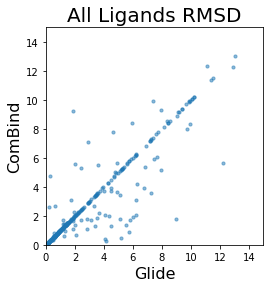

In [3]:
from scipy.stats import ttest_rel
x, y = [], []
for prot, ligs in results.items():
    for lig, (combind, glide, best) in ligs[0].items():
        x += [glide]
        y += [combind]

print ttest_rel(x, y)
f, ax = plt.subplots()
plt.scatter(x, y, alpha = 0.5, s = 10)
plt.xlabel('Glide', fontsize = 16)
plt.ylabel('ComBind', fontsize = 16)
plt.title('All Ligands RMSD', fontsize = 20)
plt.xlim(0, 15)
plt.ylim(0, 15)
plt.xticks(range(0, 15, 2), range(0, 15, 2))
ax.set_aspect('equal', 'box')
print 'Glide Average:', sum(x) / float(len(x)), sum(np.array(x) <= 2.0) /  float(len(x))
print 'ComBind Average:', sum(y) / float(len(y)), sum(np.array(y) <= 2.0) /  float(len(y))

1.86054656049 1.75009693576


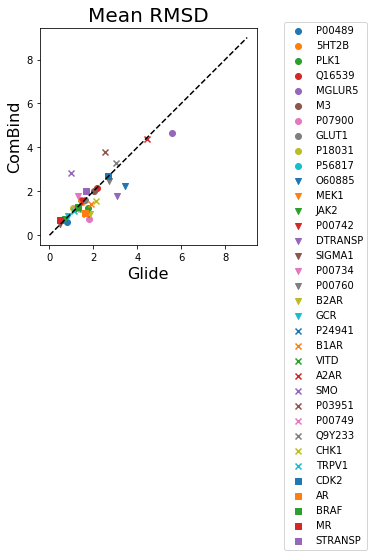

In [8]:
x, y, label = [], [], []
for prot, ligs in results.items():
    _x, _y = [], []
    for lig, (combind, glide, best) in ligs[0].items():
        if best > 2: continue
        _x += [glide]
        _y += [combind]
    label += [prot]
    x += [sum(_x)/float(len(_x))]
    y += [sum(_y)/float(len(_y))]
    
markers = ['o', 'v', 'x', 's']
f, ax = plt.subplots()
for i, (_x, _y, _label) in enumerate(zip(x, y, label)):
    plt.scatter(_x, _y, marker = markers[i/10], label = _label)
plt.xlabel('Glide', fontsize = 16)
plt.ylabel('ComBind', fontsize = 16)
plt.title('Mean RMSD', fontsize = 20)
#plt.xlim(0, 5)
#plt.ylim(0, 5)
plt.plot(range(10), linestyle='--', c = 'k')
ax.set_aspect('equal', 'box')
print sum(x) / float(len(x)), sum(y) / float(len(y))
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

P00489 10
5HT2B 2
PLK1 6
Q16539 7
MGLUR5 4
M3 2
P07900 8
GLUT1 1
P18031 8
P56817 3
O60885 8
MEK1 10
JAK2 6
P00742 6
DTRANSP 9
SIGMA1 2
P00734 6
P00760 7
B2AR 8
GCR 3
P24941 3
B1AR 9
VITD 10
A2AR 7
SMO 4
P03951 2
P00749 10
Q9Y233 7
CHK1 9
TRPV1 2
CDK2 7
AR 10
BRAF 8
MR 6
STRANSP 5
0.722823129252 0.753458049887


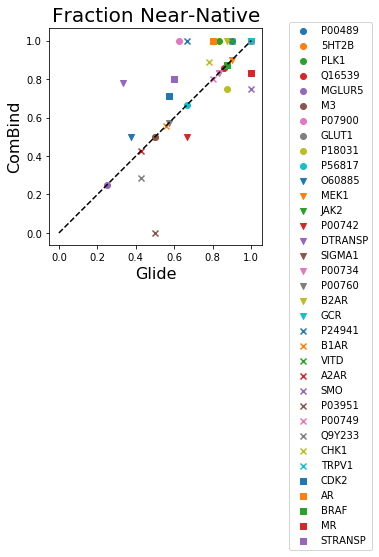

In [9]:
x, y = [], []
for prot, ligs in results.items():
    _x, _y = [], []
    for lig, (combind, glide, best) in ligs[0].items():
        if best > 2: continue
        _x += [glide <= 2.0]
        _y += [combind <= 2.0]
    label += [prot]
    print prot, len(_x)
    x += [sum(_x)/float(len(_x))]
    y += [sum(_y)/float(len(_y))]
    
markers = ['o', 'v', 'x', 's']
f, ax = plt.subplots()
for i, (_x, _y, _label) in enumerate(zip(x, y, label)):
    plt.scatter(_x, _y, marker = markers[i/10], label = _label)
plt.xlabel('Glide', fontsize = 16)
plt.ylabel('ComBind', fontsize = 16)
plt.plot(range(2), linestyle='--', c = 'k')
plt.title('Fraction Near-Native', fontsize = 20)
ax.set_aspect('equal', 'box')
print sum(x) / float(len(x)), sum(y) / float(len(y))
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [7]:
for prot, ligs in results.items():
    print prot, ligs[1]

P00489 [976.9554429568964, 972.2691732475189, 942.1261291079647]
5HT2B [200.5354426814371, 200.5354426814371, 186.31054882589027]
PLK1 [902.7954601991, 894.3186319258311, 821.8291807535749]
Q16539 [855.3687200426629, 759.5237274964229, 796.4123611980136]
MGLUR5 [449.7625941266525, 449.13465177168473, 409.90407259860086]
M3 [222.52641576091293, 222.52641576091293, 208.30764605617804]
P07900 [715.934550770732, 702.8652969123283, 656.7184145492142]
GLUT1 [284.80585346343184, 282.9082031992192, 233.21476884340305]
P18031 [905.4851283891423, 893.3043887562222, 889.1730972941815]
P56817 [922.7215692896816, 915.5917453364387, 748.7142680278423]
O60885 [864.469267764419, 850.0491153672264, 738.285355105386]
MEK1 [1200.930308238314, 1200.930308238314, 934.4182680462449]
JAK2 [940.5765439360358, 940.5765439360358, 859.6479885612109]
P00742 [1095.7869306172388, 1094.3079713940629, 915.2780787458032]
DTRANSP [783.6355755315348, 742.9084134344179, 742.4536213793809]
SIGMA1 [162.93946927245796, 162.

In [13]:
for lig, rmsds in results['SMO'][0].items():
    print lig, rmsds

4JKV_lig (0.32589603038910825, 0.32589603038910825, 0.3113318748937615)
5L7I_lig (9.22876914564302, 1.8379622213597098, 0.9138040419041752)
4O9R_lig (11.511731832119763, 11.511731832119763, 11.511731832119763)
4QIN_lig (7.18754548779533, 7.18754548779533, 6.91714525722448)
5V57_lig (0.33329986896948655, 0.33329986896948655, 0.33329986896948655)
4QIM_lig (1.5006375076430627, 1.5006375076430627, 1.215031414396402)
4N4W_lig (9.134390231009537, 9.134390231009537, 8.27013910227443)
